## Evaluate ToxiCR predictions in my Dataset (filename: test_mydata.xlsx)

In [ ]:
!pip install seaborn

Accuracy: 0.5719148936170213
Precision: 0.9970588235294118
Recall: 0.14425531914893616
F1 Score: 0.2520446096654275
Confusion Matrix:
[[2349    1]
 [2011  339]]


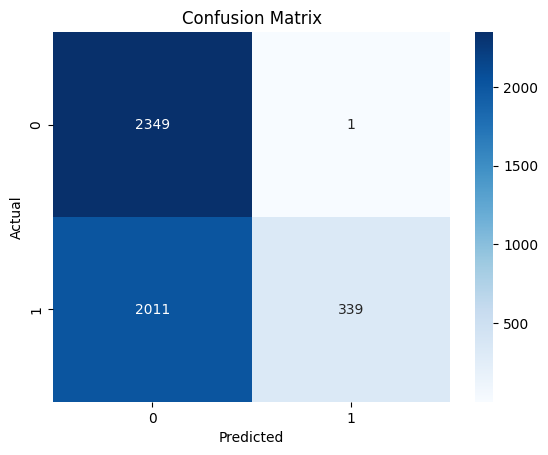

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
file_path = 'prediction_mydata_by_ToxiCR.csv'
data = pd.read_csv(file_path)

# Extract prediction and actual values
predictions = data['prediction']
actual = data['actual']

# Calculate metrics
accuracy = accuracy_score(actual, predictions)
precision = precision_score(actual, predictions)
recall = recall_score(actual, predictions)
f1 = f1_score(actual, predictions)

# Create a confusion matrix
confusion = confusion_matrix(actual, predictions)

# Display results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)

# Create a fancy confusion matrix heatmap
class_names = ['0', '1']  # Replace with your class labels
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Evaluate MyModel predictions in my splited test Dataset (filename: for_Test_data.xlsx)

Accuracy: 0.9622021364009861
Precision: 0.9277310924369748
Recall: 0.9184692179700499
F1 Score: 0.9230769230769231
Confusion Matrix:
[[1790   43]
 [  49  552]]


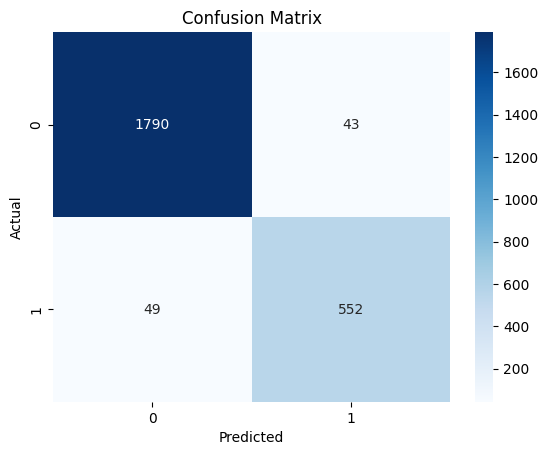

In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
file_path = 'prediction_mytestData.csv'
data = pd.read_csv(file_path)

# Extract prediction and actual values
predictions = data['prediction']
actual = data['actual']

# Calculate metrics
accuracy = accuracy_score(actual, predictions)
precision = precision_score(actual, predictions)
recall = recall_score(actual, predictions)
f1 = f1_score(actual, predictions)

# Create a confusion matrix
confusion = confusion_matrix(actual, predictions)

# Display results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)

# Create a fancy confusion matrix heatmap
class_names = ['0', '1']  # Replace with your class labels
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [3]:
import pandas as pd
from openpyxl import load_workbook

# Load the CSV file into a pandas DataFrame
file_path = 'prediction_mydata_by_ToxiCR.csv'

data = pd.read_csv(file_path)

# Create a function to apply styles to rows
def color_rows(row):
    if row['prediction'] == 0 and row['actual'] == 1:
        return ['background-color: #FFD6D6'] * len(row)
    else:
        return [''] * len(row)

# Apply the function to the DataFrame
styled_data = data.style.apply(color_rows, axis=1)

# Save the styled DataFrame to an Excel file
styled_file_path = 'styled_output.xlsx'
styled_data.to_excel(styled_file_path, engine='openpyxl', index=False)

print("Styled file saved:", styled_file_path)


Styled file saved: styled_output.xlsx


In [4]:
import pandas as pd

# Load the original CSV file into a pandas DataFrame
original_file_path = 'prediction_github_projectsComment/prediction_comments_tutorials.csv'
data = pd.read_csv(original_file_path)

# Filter rows where the "prediction" column value is 1
filtered_data = data[data['prediction'] == 1]

# Add a new column with the CSV file name
filtered_data['file_name'] = 'prediction_comments_tutorials.csv'

# Save the filtered data to a new CSV file
filtered_file_path = 'uncivil_github_comments.csv'
filtered_data.to_csv(filtered_file_path, mode='a', header=False, index=False)

print("Filtered data saved to:", filtered_file_path)


Filtered data saved to: uncivil_github_comments.csv


/tmp/ipykernel_539923/2592131918.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['file_name'] = 'prediction_comments_tutorials.csv'


## Manual investigation of github comments detected as Uncivil and compare the result with ToxiCR

In [ ]:
import pandas as pd
import random

# Load the base CSV file into a pandas DataFrame
# Load the base CSV file into a pandas DataFrame
base_file_path = 'prediction_uncivil_github_comments.csv'
base_data = pd.read_csv(base_file_path)

# Set the number of rows to select randomly
n = 364  # Adjust this number as needed  95% confidence and 5% error-rate

# Shuffle the base data to ensure randomness
shuffled_data = base_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the shuffled data into non-overlapping segments
segment_length = len(shuffled_data) // 3
segment_1 = shuffled_data[:segment_length]
segment_2 = shuffled_data[segment_length:2 * segment_length]
segment_3 = shuffled_data[2 * segment_length:]

# Select n rows from each segment
selected_data_1 = segment_1.sample(n=n, random_state=42)
selected_data_2 = segment_2.sample(n=n, random_state=43)  # Use different random_state
selected_data_3 = segment_3.sample(n=n, random_state=44)  # Use different random_state

# Save selected data to separate CSV files
selected_file_path_1 = 'Manual_investigation_data_1.csv'
selected_data_1.to_csv(selected_file_path_1, index=False)

selected_file_path_2 = 'Manual_investigation_data_2.csv'
selected_data_2.to_csv(selected_file_path_2, index=False)

selected_file_path_3 = 'Manual_investigation_data_3.csv'
selected_data_3.to_csv(selected_file_path_3, index=False)

print("Selected data saved to:", selected_file_path_1)
print("Selected data saved to:", selected_file_path_2)
print("Selected data saved to:", selected_file_path_3)


## Manual analysis of predicted result of ToxiCR and MyModel for detection 

In [6]:
import pandas as pd

# Load the Excel file
xlsx_file_path = "Manual_investigation_Final.xlsx"
df = pd.read_excel(xlsx_file_path)

# Calculate metrics for "MModel" predictions
actual_values = df["actual"]
mmodel_predictions = df["Mmodel"]
toxicr_predictions = df["ToxiCR"]

# Calculate TP, TN, FP, FN for "MModel" predictions
mmodel_tp = sum((actual_values == 1) & (mmodel_predictions == 1))
mmodel_tn = sum((actual_values == 0) & (mmodel_predictions == 0))
mmodel_fp = sum((actual_values == 0) & (mmodel_predictions == 1))
mmodel_fn = sum((actual_values == 1) & (mmodel_predictions == 0))

# Calculate TP, TN, FP, FN for "ToxiCR" predictions
toxicr_tp = sum((actual_values == 1) & (toxicr_predictions == 1))
toxicr_tn = sum((actual_values == 0) & (toxicr_predictions == 0))
toxicr_fp = sum((actual_values == 0) & (toxicr_predictions == 1))
toxicr_fn = sum((actual_values == 1) & (toxicr_predictions == 0))

# Calculate the number of positive and negative instances in the "actual" column
num_positive_actual = sum(actual_values == 1)
num_negative_actual = sum(actual_values == 0)

print("Number of Positive Instances in Actual:", num_positive_actual)
print("Number of Negative Instances in Actual:", num_negative_actual)

# Print the results for MModel
print("Metrics for MModel:")
print("True Positives:", mmodel_tp)
print("True Negatives:", mmodel_tn)
print("False Positives:", mmodel_fp)
print("False Negatives:", mmodel_fn)

# Print the results for ToxiCR
print("\nMetrics for ToxiCR:")
print("True Positives:", toxicr_tp)
print("True Negatives:", toxicr_tn)
print("False Positives:", toxicr_fp)
print("False Negatives:", toxicr_fn)


Number of Positive Instances in Actual: 571
Number of Negative Instances in Actual: 444
Metrics for MModel:
True Positives: 571
True Negatives: 350
False Positives: 94
False Negatives: 0

Metrics for ToxiCR:
True Positives: 364
True Negatives: 386
False Positives: 58
False Negatives: 207


In [7]:
# Calculate precision, recall, specificity, and F1-score for binary classification
def calculate_metrics(tp, tn, fp, fn):
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1_score = 2 * (precision * recall) / (precision + recall)
    return precision, recall, specificity, f1_score

# Calculate metrics for "MModel" predictions
mmodel_precision, mmodel_recall, mmodel_specificity, mmodel_f1 = calculate_metrics(mmodel_tp, mmodel_tn, mmodel_fp, mmodel_fn)

# Calculate metrics for "ToxiCR" predictions
toxicr_precision, toxicr_recall, toxicr_specificity, toxicr_f1 = calculate_metrics(toxicr_tp, toxicr_tn, toxicr_fp, toxicr_fn)

# Print the results for MModel
print("Metrics for MModel:")
print("Precision:", mmodel_precision)
print("Recall:", mmodel_recall)
print("Specificity:", mmodel_specificity)
print("F1-Score:", mmodel_f1)

# Print the results for ToxiCR
print("\nMetrics for ToxiCR:")
print("Precision:", toxicr_precision)
print("Recall:", toxicr_recall)
print("Specificity:", toxicr_specificity)
print("F1-Score:", toxicr_f1)


Metrics for MModel:
Precision: 0.8586466165413534
Recall: 1.0
Specificity: 0.7882882882882883
F1-Score: 0.923948220064725

Metrics for ToxiCR:
Precision: 0.8625592417061612
Recall: 0.637478108581436
Specificity: 0.8693693693693694
F1-Score: 0.7331319234642497


In [11]:
import pandas as pd

# Load the Excel file
xlsx_file_path = "Manual_investigation_Final.xlsx"
df = pd.read_excel(xlsx_file_path)

# Calculate metrics for "MModel" predictions
actual_values = df["actual"]
mmodel_predictions = df["GPT4"]


# Calculate TP, TN, FP, FN for "MModel" predictions
mmodel_tp = sum((actual_values == 1) & (mmodel_predictions == 1))
mmodel_tn = sum((actual_values == 0) & (mmodel_predictions == 0))
mmodel_fp = sum((actual_values == 0) & (mmodel_predictions == 1))
mmodel_fn = sum((actual_values == 1) & (mmodel_predictions == 0))

# Calculate the number of positive and negative instances in the "actual" column
num_positive_actual = sum(actual_values == 1)
num_negative_actual = sum(actual_values == 0)

print("Number of Positive Instances in Actual:", num_positive_actual)
print("Number of Negative Instances in Actual:", num_negative_actual)

# Print the results for GPT
print("Metrics for MModel:")
print("True Positives:", mmodel_tp)
print("True Negatives:", mmodel_tn)
print("False Positives:", mmodel_fp)
print("False Negatives:", mmodel_fn)


Number of Positive Instances in Actual: 571
Number of Negative Instances in Actual: 444
Metrics for MModel:
True Positives: 121
True Negatives: 442
False Positives: 2
False Negatives: 450


In [12]:
# Calculate precision, recall, specificity, and F1-score for binary classification
def calculate_metrics(tp, tn, fp, fn):
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1_score = 2 * (precision * recall) / (precision + recall)
    return precision, recall, specificity, f1_score

# Calculate metrics for "MModel" predictions
mmodel_precision, mmodel_recall, mmodel_specificity, mmodel_f1 = calculate_metrics(mmodel_tp, mmodel_tn, mmodel_fp, mmodel_fn)

# Calculate metrics for "ToxiCR" predictions
toxicr_precision, toxicr_recall, toxicr_specificity, toxicr_f1 = calculate_metrics(toxicr_tp, toxicr_tn, toxicr_fp, toxicr_fn)

# Print the results for GPT4
print("Metrics for MModel:")
print("Precision:", mmodel_precision)
print("Recall:", mmodel_recall)
print("Specificity:", mmodel_specificity)
print("F1-Score:", mmodel_f1)



Metrics for MModel:
Precision: 0.983739837398374
Recall: 0.2119089316987741
Specificity: 0.9954954954954955
F1-Score: 0.3487031700288185
